# CARREGANDO BIBLIOTECAS E DADOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from IPython.display import Image
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [2]:
lombalgia = pd.read_csv(r'.../lombalgia.csv')
cervicalgia = pd.read_csv(r'.../cervicalgia.csv')
dor_tornozelo = pd.read_csv(r'.../dor_tornozelo.csv')
entorse_tornozelo = pd.read_csv(r'.../entorse_tornozelo.csv')

# LOMBALGIA

## 1. Estudos através dos anos

### 1.1.Criando dataframe

In [3]:
lombalgia.drop(columns=['Unnamed: 0'], inplace=True)
lombalgia['ano'].replace(1000, 2016, inplace=True)
lombalgia_grafico_anos = lombalgia.groupby('ano')['tipo estudo'].value_counts().to_frame()
lombalgia_grafico_anos.columns = ['quantidade']
lombalgia_grafico_anos.reset_index(inplace=True)
lombalgia_grafico_anos.rename(columns={'tipo estudo':'tipo de estudo'}, inplace=True)

In [19]:
print(f'Sobre o tema lombalgia foram encontrados {lombalgia.shape[0]} estudos desde o ano {lombalgia["ano"].min()}')

Sobre o tema lombalgia foram encontrados 2927 estudos desde o ano 1955


### 1.2.Gráfico de linha

#### Versão interativa

In [4]:
fig = px.line(data_frame=lombalgia_grafico_anos, x="ano", y="quantidade", 
              color="tipo de estudo", title='Artigos sobre lombalgia ao longo dos anos')
fig.show()

c:\Users\55199\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning:

urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!



#### Imagem

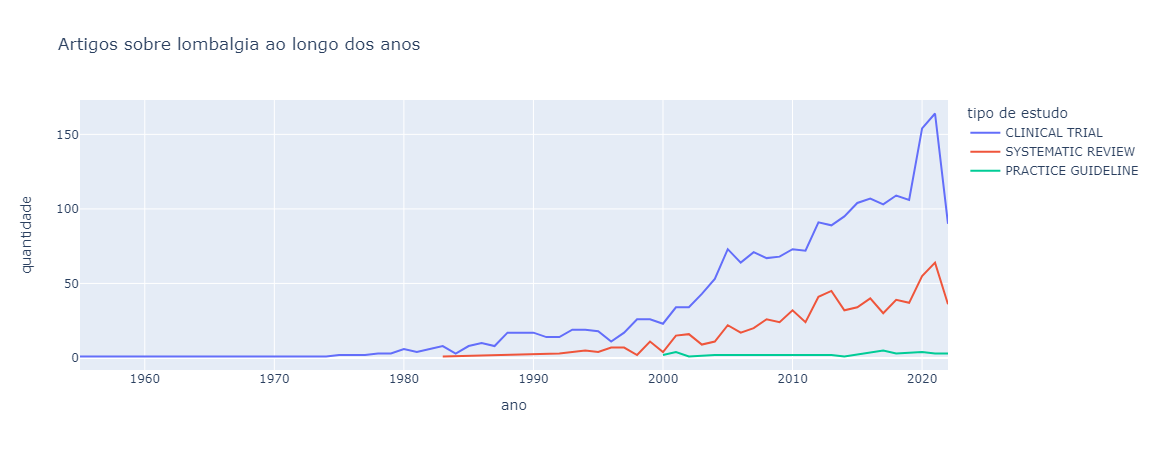

In [5]:
Image(filename='.../lombalgia anos.png')

## 2. Qualidade dos ensaios

### 2.1.Criando dataframe

In [6]:
lombalgia_nota = lombalgia[lombalgia['tipo estudo'] == 'CLINICAL TRIAL']
lombalgia_nota['escala pedro'] = lombalgia_nota['escala pedro'].apply(lambda x: np.nan if x == 'B' or x == 'T' or x == '0' else int(x))

C:\Users\55199\AppData\Local\Temp\ipykernel_8000\2894774818.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 2.2.Histograma

#### Versão interativa

In [7]:
fig = px.histogram(data_frame=lombalgia_nota, x="escala pedro", 
                   title='Ensaios clínicos sobre lombalgia (Escala PEDro)')
fig.show()

#### Imagem

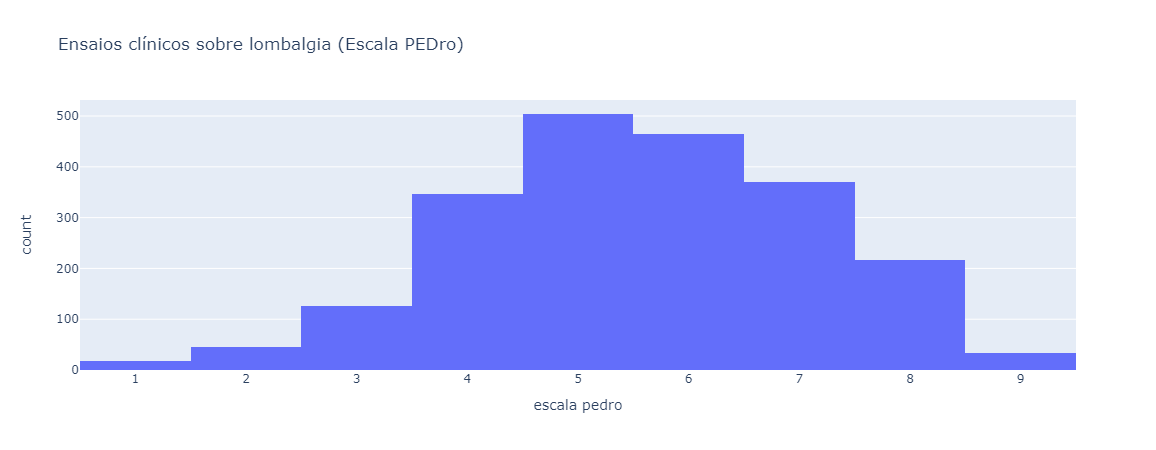

In [8]:
Image(filename='.../nota lombalgia.png')

# CERVICALGIA

## 1. Estudos através dos anos

### 1.1.Criando dataframe

In [9]:
cervicalgia.drop(columns=['Unnamed: 0'], inplace=True)
cervicalgia_grafico_anos = cervicalgia.groupby('ano')['tipo estudo'].value_counts().to_frame()
cervicalgia_grafico_anos.columns = ['quantidade']
cervicalgia_grafico_anos.reset_index(inplace=True)
cervicalgia_grafico_anos.head(5)
cervicalgia_grafico_anos.rename(columns={'tipo estudo':'tipo de estudo'}, inplace=True)

In [18]:
print(f'Sobre o tema cervicalgia foram encontrados {cervicalgia.shape[0]} estudos desde o ano {cervicalgia["ano"].min()}')

Sobre o tema cervicalgia foram encontrados 1482 estudos desde o ano 1966


### 1.2.Gráfico de linha

#### Versão interativa

In [10]:
fig = px.line(data_frame=cervicalgia_grafico_anos, x="ano", y="quantidade", color="tipo de estudo", 
              title='Artigos sobre cervicalgia ao longo dos anos')
fig.show()

#### Imagem

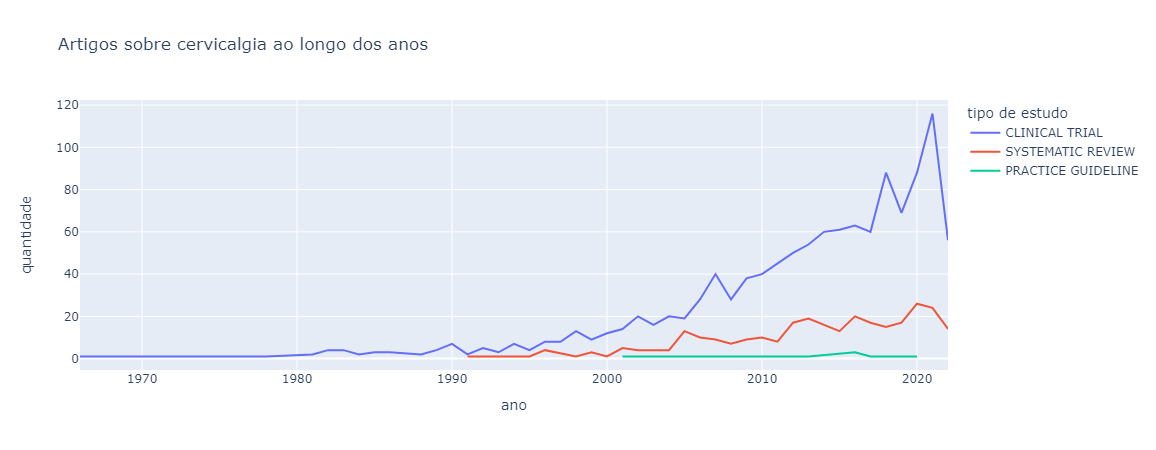

In [11]:
Image(filename='.../cervicalgia anos.png')

## 2. Qualidade dos ensaios

### 2.1.Criando dataframe

In [12]:
cervicalgia_nota = cervicalgia[cervicalgia['tipo estudo'] == 'CLINICAL TRIAL']
cervicalgia_nota['escala pedro'] = cervicalgia_nota['escala pedro'].apply(lambda x: np.nan if x == 'T' else int(x))

C:\Users\55199\AppData\Local\Temp\ipykernel_8000\797954401.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Histograma

#### Versão interativa

In [13]:
fig = px.histogram(data_frame=cervicalgia_nota, x="escala pedro", 
                   title='Ensaios clínicos sobre cervicalgia (Escala PEDro)')
fig.show()

#### Imagem

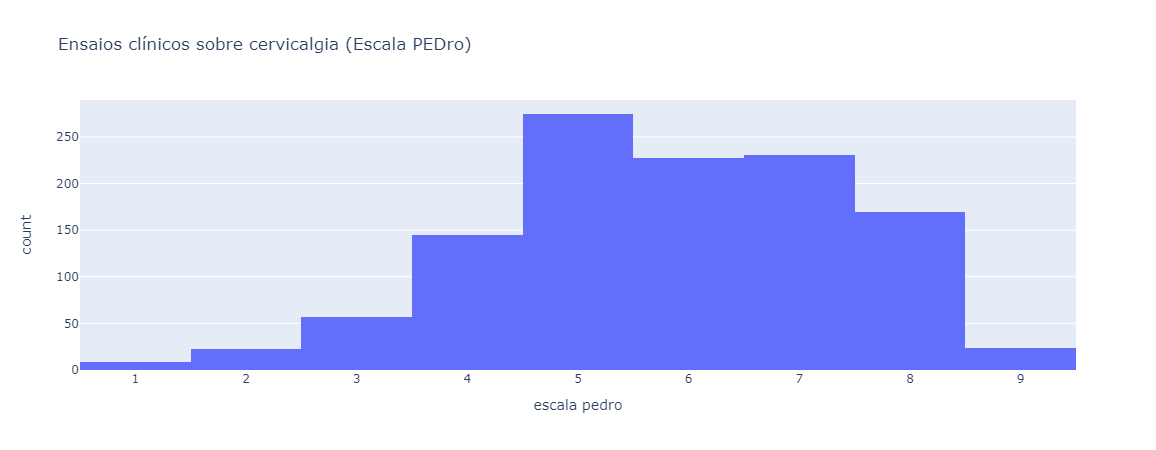

In [14]:
Image(filename='.../nota cervicalgia.png')

# Proximas análises por vir :)